
# Load FES currents

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
import numpy as np
import xarray as xr
from utide._ut_constants import ut_constants as utide

from utils import *

# useful variables
j=np.complex(0,1)
cpd=2.*np.pi/86400. # from cpd to radian/s
crs = ccrs.PlateCarree() # cartopy

#datadir = '/home/lervily/cgonzale/data/IWSST/tides/'
#bathy = '/home/lervily/cgonzale/data/IWSST/tides/ETOPO2v2c_f4.nc'
bathy = '/home2/pharos/othr/aponte/bathy/ETOPO2v2c_f4.nc'
datadir = '/home2/pharos/othr/aponte/tides/FES2014/'
#datadir = './'

# tmp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load fes currents for one constituent

U, V, constituents, omega = get_fes_uv(constituents=['m2'], lonb=(30, 130), latb=(-40, 0), fes=datadir,bathy=None)
print(U)

7.292116514526208e-05
<xarray.Dataset>
Dimensions:    (lat: 641, lon: 1601)
Coordinates:
  * lat        (lat) float32 -40.0 -39.9375 -39.875 -39.8125 -39.75 -39.6875 ...
  * lon        (lon) float32 30.0 30.0625 30.125 30.1875 30.25 30.3125 ...
Data variables:
    m2         (lat, lon) float64 dask.array<shape=(641, 1601), chunksize=(200, 20)>
    longitude  (lon, lat) float32 30.0 30.0 30.0 30.0 30.0 30.0 30.0 30.0 ...
    latitude   (lat, lon) float32 -40.0 -40.0 -40.0 -40.0 -40.0 -40.0 -40.0 ...


In [3]:
cst = 'm2'
toplt = np.sqrt(U[cst]**2+V[cst]**2)
print(toplt)

<xarray.DataArray 'm2' (lat: 641, lon: 1601)>
array([[ 1.281482,  1.279147,  1.276813, ...,  0.242241,  0.24163 ,  0.241032],
       [ 1.278207,  1.275874,  1.273541, ...,  0.241059,  0.240443,  0.23984 ],
       [ 1.274948,  1.272616,  1.270285, ...,  0.239891,  0.23927 ,  0.238662],
       ...,
       [      nan,       nan,       nan, ...,  7.482036, 23.404968, 32.524399],
       [      nan,       nan,       nan, ..., 12.113481, 22.86498 , 25.692427],
       [      nan,       nan,       nan, ..., 22.876124, 28.404061, 32.2411  ]])
Coordinates:
  * lat      (lat) float32 -40.0 -39.9375 -39.875 -39.8125 -39.75 -39.6875 ...
  * lon      (lon) float32 30.0 30.0625 30.125 30.1875 30.25 30.3125 30.375 ...


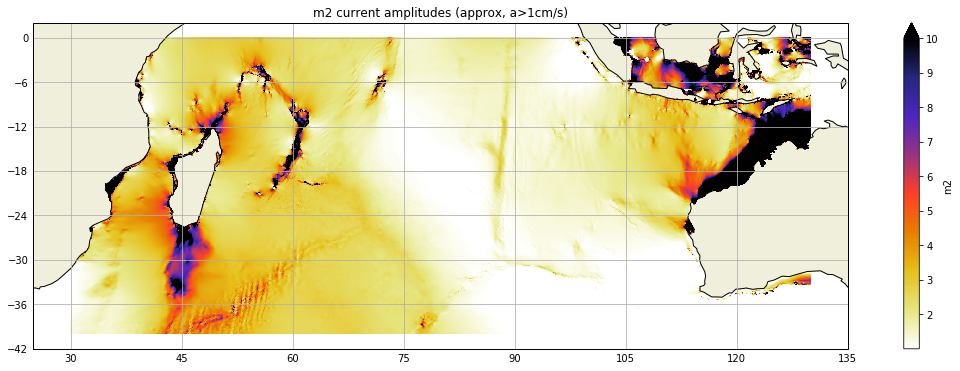

In [4]:

### plot a map of current amplitudes
toplt = toplt.where(toplt >1)
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection=crs)
toplt.plot(cmap=plt.get_cmap('CMRmap_r'),vmax = 10)
ax.set_title(cst+' current amplitudes (approx, a>1cm/s)')
gl = ax.gridlines(crs=crs, draw_labels=True) 
gl.xlabels_top = False
gl.ylabels_right = False
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
plt.show()